In [1]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import Utils.DiaSourceTools as DSTools
from astropy.time import Time

import lsst.afw.display.ds9 as ds9

import re

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Test/"
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_daytest/"

In [3]:
directory = DATADIR+"/detect_testSN2/"
butler = dafPersist.Butler(directory) 

In [4]:
patches = []
patches_file=open(DATADIR+"patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()

In [5]:
dates = []
days_file=open(DATADIR+"day_list.txt", "rb")

for day in days_file:
    day = day.replace('\n','')
    dates.append(day)

days_file.close()
print dates
print patches

['2006-01-31', '2006-02-03', '2006-02-06', '2006-02-25', '2006-03-05', '2006-04-23', '2006-04-26', '2006-04-30', '2006-05-04', '2006-05-20', '2006-05-24', '2006-05-28', '2006-06-02', '2006-06-06', '2006-06-20', '2006-06-25', '2006-06-30', '2006-07-03', '2006-07-19', '2006-07-23', '2006-07-27']
['8,5', '8,6', '8,7', '8,8', '8,9', '8,10', '8,11', '8,12', '8,13', '8,14', '8,15', '8,16', '8,17', '8,18', '8,19', '8,20', '8,21', '8,22', '8,23', '8,24', '8,25', '9,5', '9,6', '9,7', '9,8', '9,9', '9,10', '9,11', '9,12', '9,13', '9,14', '9,15', '9,16', '9,17', '9,18', '9,19', '9,20', '9,21', '9,22', '9,23', '9,24', '9,25', '10,5', '10,6', '10,7', '10,8', '10,9', '10,10', '10,11', '10,12', '10,13', '10,14', '10,15', '10,16', '10,17', '10,18', '10,19', '10,20', '10,21', '10,22', '10,23', '10,24', '10,25', '11,5', '11,6', '11,7', '11,8', '11,9', '11,10', '11,11', '11,12', '11,13', '11,14', '11,15', '11,16', '11,17', '11,18', '11,19', '11,20', '11,21', '11,22', '11,23', '11,24', '11,25', '12,5', '1

In [6]:
dates_dict = {}
for date in dates:
    dates_dict[date] = []

In [7]:
catalogs = []

for date in dates:
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
            dates_dict[date].append(patch)
            if date_catalog is None:
                date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
            else:
                date_catalog.extend(butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}))
        
    catalogs.append((date, date_catalog))

In [8]:
print dates_dict["2006-06-06"]

['12,5', '12,6', '12,7', '12,8', '12,9', '12,10', '12,11', '12,12', '12,13', '12,14', '12,15', '12,16', '12,17', '12,18', '12,19', '12,20', '12,21', '12,22', '12,23', '12,24', '12,25', '13,5', '13,6', '13,7', '13,8', '13,9', '13,10', '13,11', '13,12', '13,13', '13,14', '13,15', '13,16', '13,17', '13,18', '13,19', '13,20', '13,21', '13,22', '13,23', '13,24', '13,25', '14,5', '14,6', '14,7', '14,8', '14,9', '14,10', '14,11', '14,12', '14,13', '14,14', '14,15', '14,16', '14,17', '14,18', '14,19', '14,20', '14,21', '14,22', '14,23', '14,24', '14,25', '15,5', '15,6', '15,7', '15,8', '15,9', '15,10', '15,11', '15,12', '15,13', '15,14', '15,15', '15,16', '15,17', '15,18', '15,19', '15,20', '15,21', '15,22', '15,23', '15,24', '15,25', '16,5', '16,6', '16,7', '16,8', '16,9', '16,10', '16,11', '16,12', '16,13', '16,14', '16,15', '16,16', '16,17', '16,18', '16,19', '16,20', '16,21', '16,22', '16,23', '16,24', '16,25', '17,5', '17,6', '17,7', '17,8', '17,9', '17,10', '17,11', '17,12', '17,13', '17

In [9]:
for date,catalog in catalogs:
    print len(catalog)

14565
3581
5868
3522
11726
6208
6123
15567
16882
2835
9378
7730
10461
12081
4085
9894
6583
7889
3085
10928
6967


In [10]:

#multi_matches = afwTable.MultiMatch(catalogs[0].schema, {'mjd':int}, radius=afwGeom.Angle(0.000005, afwGeom.radians))

In [11]:
multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
for date, catalog in catalogs:
    t = Time(date)

    multi_matches.add(catalog, {'mjd':int(t.mjd)})
    print t.mjd
results = multi_matches.finish(removeAmbiguous=False)

53766.0
53769.0
53772.0
53791.0
53799.0
53848.0
53851.0
53855.0
53859.0
53875.0
53879.0
53883.0
53888.0
53892.0
53906.0
53911.0
53916.0
53919.0
53935.0
53939.0
53943.0


In [12]:
multi_matches = afwTable.MultiMatch(catalogs[0][-1].schema, {'mjd':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))

for date in dates:
    t = Time(date)
    date_catalog = None
    for patch in patches:
        if butler.datasetExists("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
            date_catalog = butler.get("dayDiff_class_diaSrc", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
            multi_matches.add(date_catalog, {'mjd':int(t.mjd)})
        
    
results = multi_matches.finish(removeAmbiguous=False)    

In [13]:
lcs = DSTools.get_light_curves_from_multimatch_results2(results)

In [14]:
len(lcs)

49623

In [141]:
t_lcs = DSTools.threshold_light_curves(lcs, 4)

In [142]:
len(t_lcs)

10175

In [17]:

stack_lc = []
for t_lc in t_lcs:
    stack_lc.append(DSTools.build_lightcurve3(t_lc, "base_CircularApertureFlux_3_0_flux"))

06D3bz 14 17 10.042 +53 01 29.370


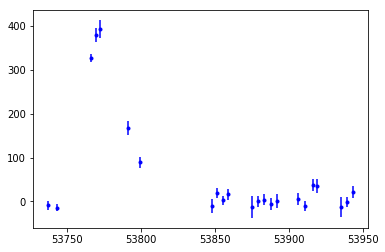

06D3cb 14 20 43.574 +52 11 27.830


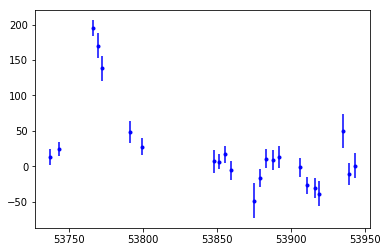

06D3cc 14 17 31.600 +52 54 44.900


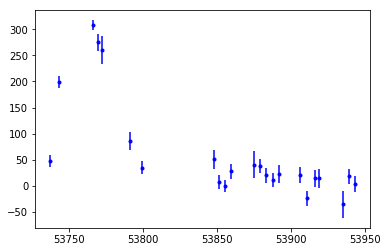

06D3cn 14 19 25.848 +52 38 27.540


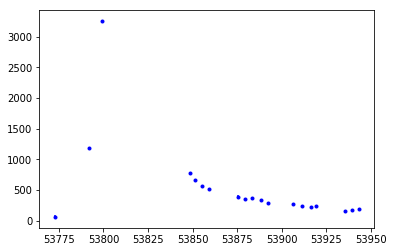

06D3df 14 22 17.209 +52 57 27.650


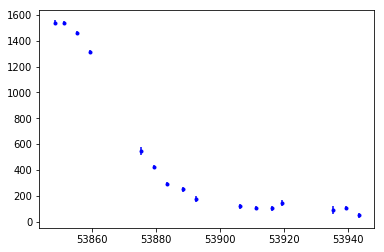

06D3dl 14 22 12.577 +52 38 27.050


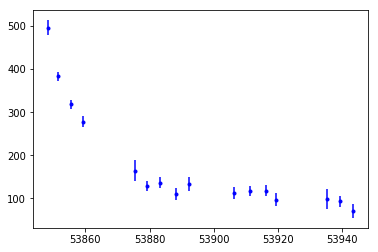

06D3do 14 16 59.392 +52 52 57.160


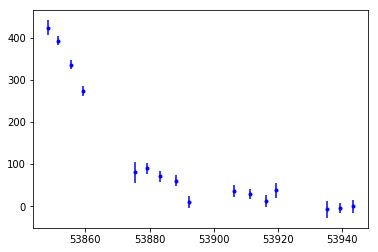

06D3dt 14 17 21.664 +52 27 10.140


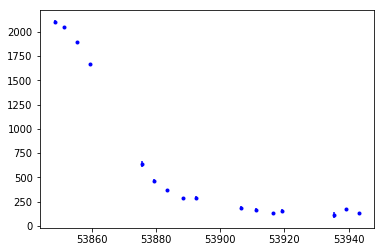

06D3ed 14 18 47.802 +52 45 23.610


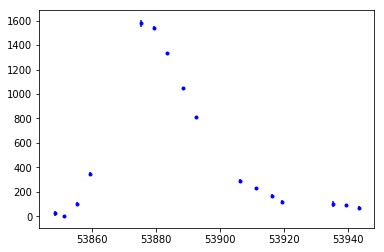

06D3el 14 17 01.087 +52 13 56.640


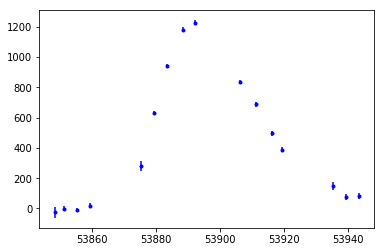

06D3em 14 19 23.419 +53 01 22.850


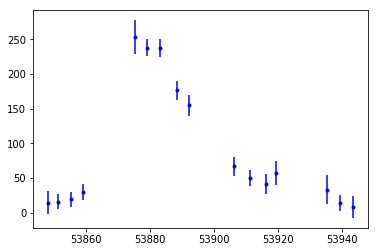

06D3en 14 21 13.336 +52 27 21.880


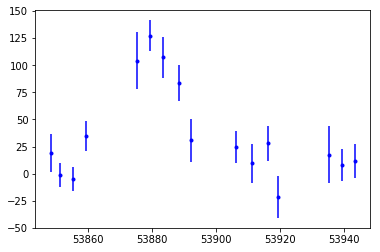

06D3et 14 22 04.770 +52 20 18.120


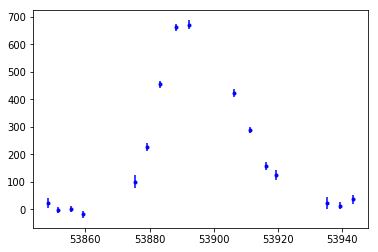

06D3fp 14 20 18.605 +52 53 49.790


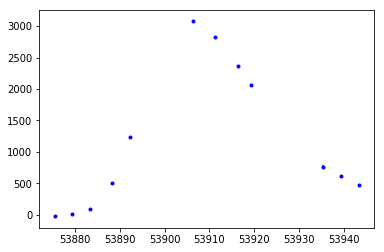

06D3gh 14 18 31.419 +52 26 34.470


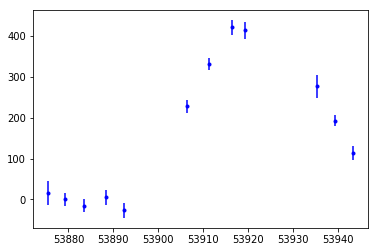

06D3gn 14 17 44.630 +52 21 40.250


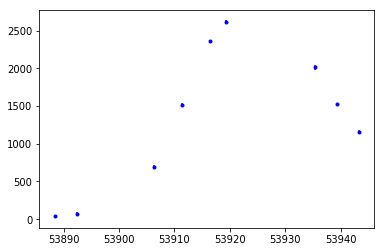

06D3gx 14 17 03.234 +52 56 10.510


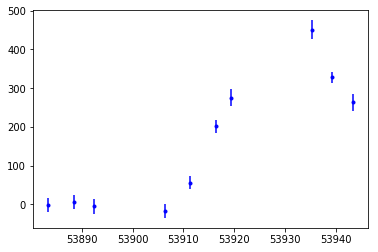

In [18]:
%matplotlib inline
import re
import astropy.coordinates as coord
import astropy.units as u

filter='r'

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

snls_array = []
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = DSTools.build_light_curve_from_snls_file(m, c)
    print sn[0], sn[-1]
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()

In [20]:

matches = DSTools.match_control_group(stack_lc,snls_array)
float(len(matches))/float(len(snls_array))

0.35294117647058826

In [21]:
len(matches)

6

In [22]:
for lc in snls_array:
    print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for slc in stack_lc:

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            print "here", len(slc)

        #print np.rad2deg(float(np.mean(slc["ra"]))), np.rad2deg(float(np.mean(slc["dec"])))

        

light curve
214.291841667 53.024825
light curve
215.181558333 52.1910638889
light curve
214.381666667 52.9124722222
light curve
214.8577 52.6409833333
here 12
light curve
215.571704167 52.9576805556
light curve
215.552404167 52.6408472222
light curve
214.247466667 52.8825444444
light curve
214.340266667 52.4528166667
here 5
here 9
light curve
214.699175 52.7565583333
here 19
light curve
214.254529167 52.2324
light curve
214.847579167 53.0230138889
here 4
light curve
215.305566667 52.4560777778
light curve
215.519875 52.3383666667
light curve
215.077520833 52.8971638889
here 9
light curve
214.6309125 52.4429083333
here 10
light curve
214.435958333 52.3611805556
here 14
light curve
214.263475 52.9362527778


In [190]:
lc = snls_array[8]
print "light curve"
val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
for slc in results:
   
        comp = {"ra":np.mean(slc["coord_ra"]), "dec":np.mean(slc["coord_dec"])}
        if DSTools.source_distance(val, comp)<1:
            print "here", date

light curve
214.699175 52.7565583333


In [180]:
lc = snls_array[8]
print "light curve"
val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
dataId= {"filter":'r',"tract":0, "patch":'20,16', 'date':'2006-06-25'}
catalog = butler.get("dayDiff_class_diaSrc", dataId=dataId)
for slc in catalog:
   
    comp = {"ra":np.mean(slc["coord_ra"]), "dec":np.mean(slc["coord_dec"])}
    if DSTools.source_distance(val, comp)<1:
        print "here"

 light curve
214.699175 52.7565583333
here


In [162]:
source = catalog[47]
np.rad2deg(float(source["coord_ra"])), np.rad2deg(float(source["coord_dec"]))
s_47 = {"ra": source["coord_ra"], "dec": source["coord_dec"]}


DSTools.source_distance(val, s_47)

0.45909014132420517

In [161]:
dataId= {"filter":'r',"tract":0, "patch":'20,16', 'date':'2006-06-25'}
dayDiff = butler.get("dayDiff_differenceExp", dataId=dataId)
catalog = butler.get("dayDiff_class_diaSrc", dataId=dataId)
ds9.mtv(dayDiff, frame=1)
ds9.setMaskTransparency(100, frame=1)

    

for i, source in enumerate(catalog):
    print i, np.rad2deg(float(source["coord_ra"])), np.rad2deg(float(source["coord_dec"]))
    ds9.dot(i, source.getX(), source.getY(), size = 2, ctype = ds9.RED, frame=1)


0 214.689430196 52.698233715
1 214.665285308 52.6998101743
2 214.674829135 52.7012046819
3 214.715356743 52.7041506786
4 214.65542609 52.704662766
5 214.68847101 52.7079677146
6 214.733845114 52.7080259481
7 214.700730703 52.7081361091
8 214.664343955 52.7081586272
9 214.672429086 52.7090183289
10 214.658998391 52.7086765763
11 214.723230629 52.7092394335
12 214.676200983 52.7096865242
13 214.698747104 52.7135852093
14 214.750591561 52.7135890478
15 214.697256233 52.7142969129
16 214.693251718 52.7175883233
17 214.679068167 52.7174573574
18 214.723059424 52.7183395355
19 214.676067282 52.7187993243
20 214.709767168 52.7239738767
21 214.737026282 52.7238783335
22 214.710781773 52.7244383827
23 214.736415088 52.7256574606
24 214.689560466 52.7257428021
25 214.659422931 52.7277443433
26 214.687914148 52.7288685172
27 214.722043034 52.7310876644
28 214.736365738 52.7309599809
29 214.732447155 52.7315747261
30 214.753626075 52.731946091
31 214.732560464 52.7352445428
32 214.692109194 52.735

In [106]:
print val, comp

{'dec': 0.91090590497982704, 'ra': 3.7556266824889084} {'dec': 0.910908 rad, 'ra': 3.75562 rad}


In [24]:
 matches = []
for lc in snls_array:
    #print "light curve"
    val = {"ra":lc[0]["ra"], "dec":lc[0]["dec"]}
    #print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])
    for slc in stack_lc:

        comp = {"ra":np.mean(slc["ra"]), "dec":np.mean(slc["dec"])}
        if DSTools.source_distance(val, comp)<1:
            matches.append((lc,slc))
            
            
print len(matches)

8


12


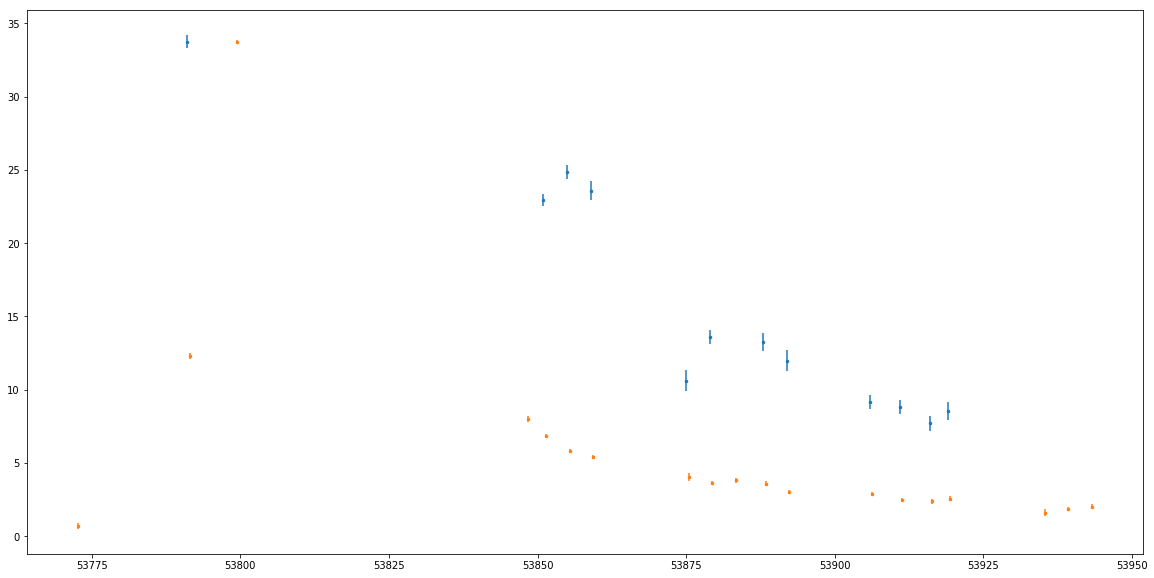

5


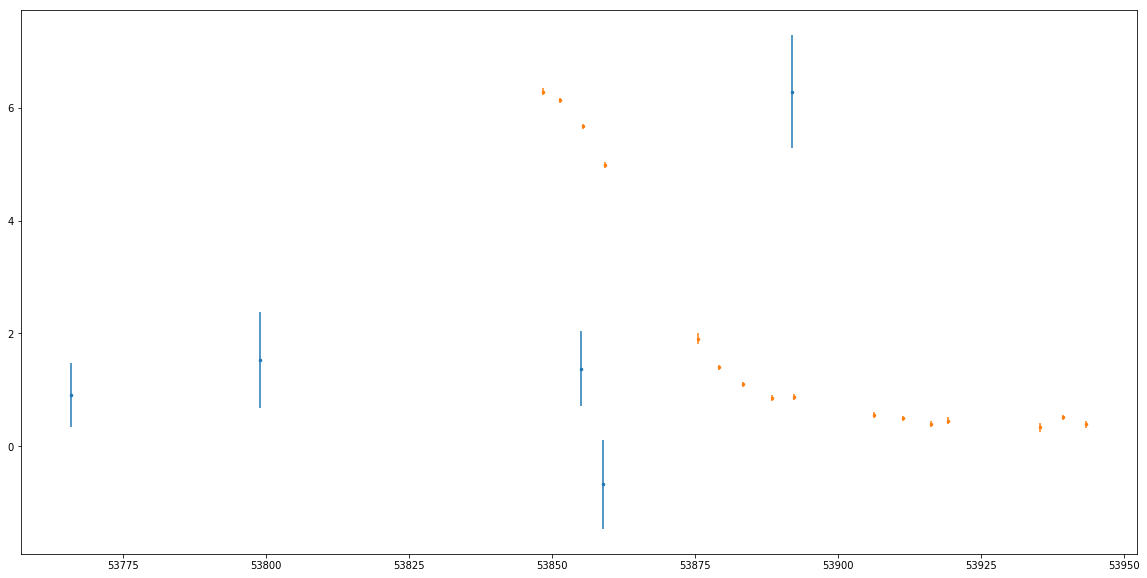

9


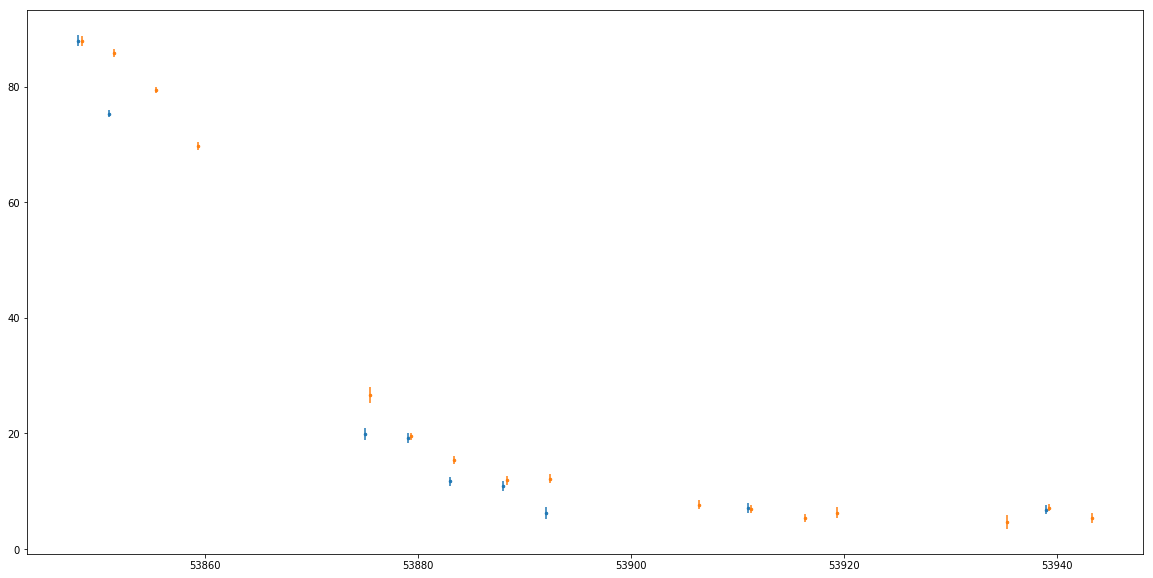

19


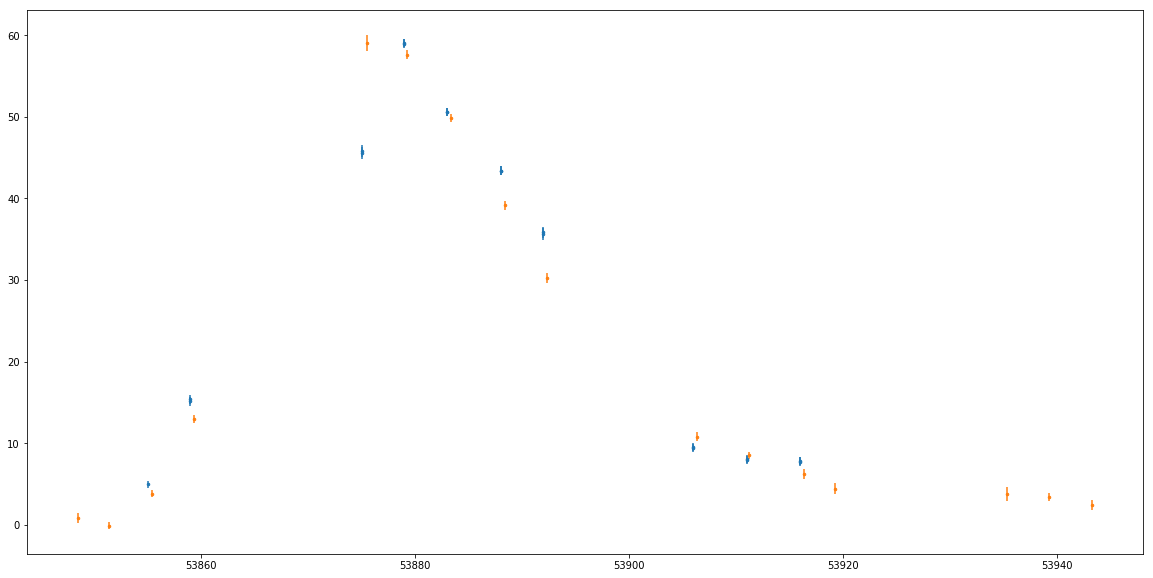

4


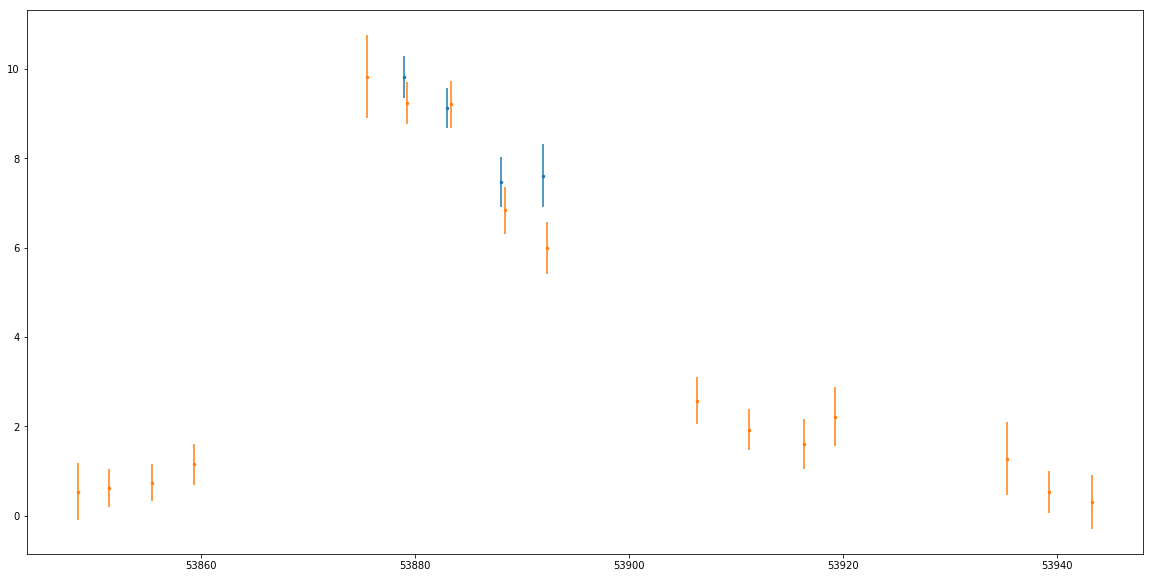

9


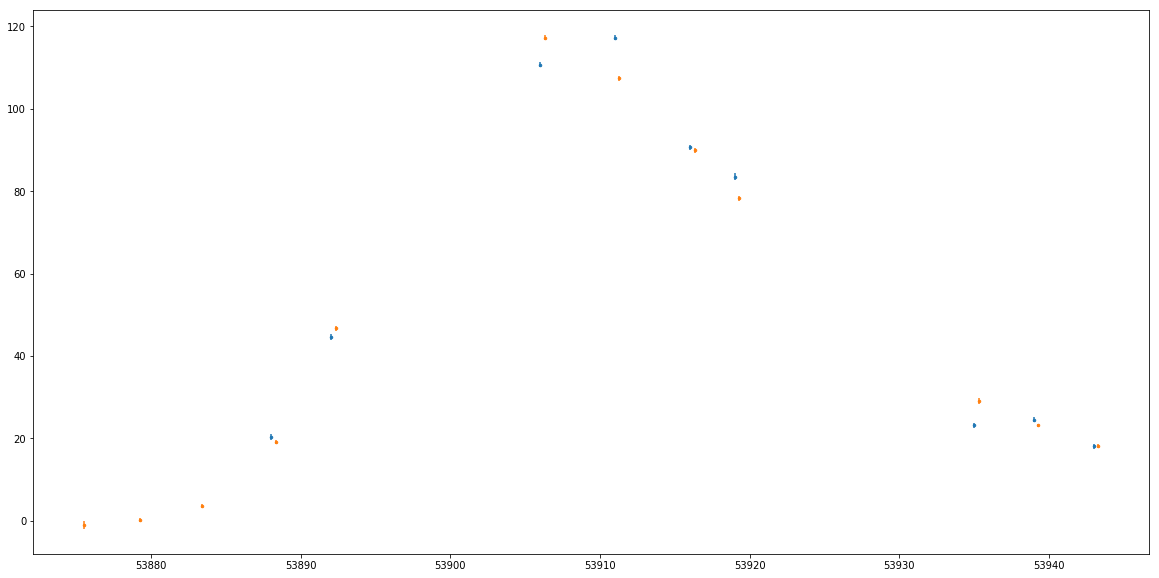

10


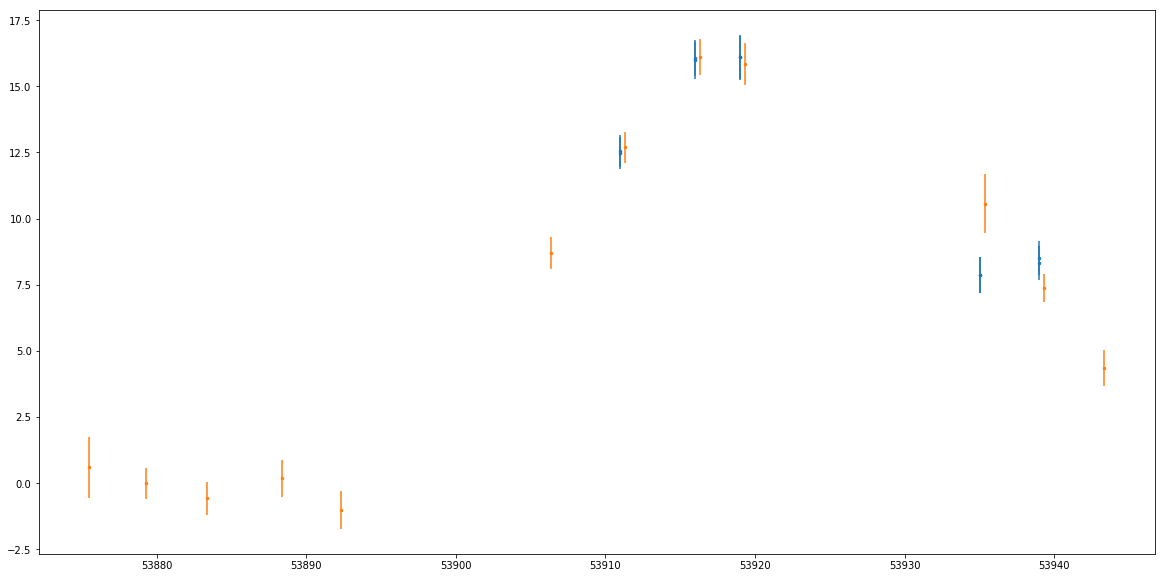

14


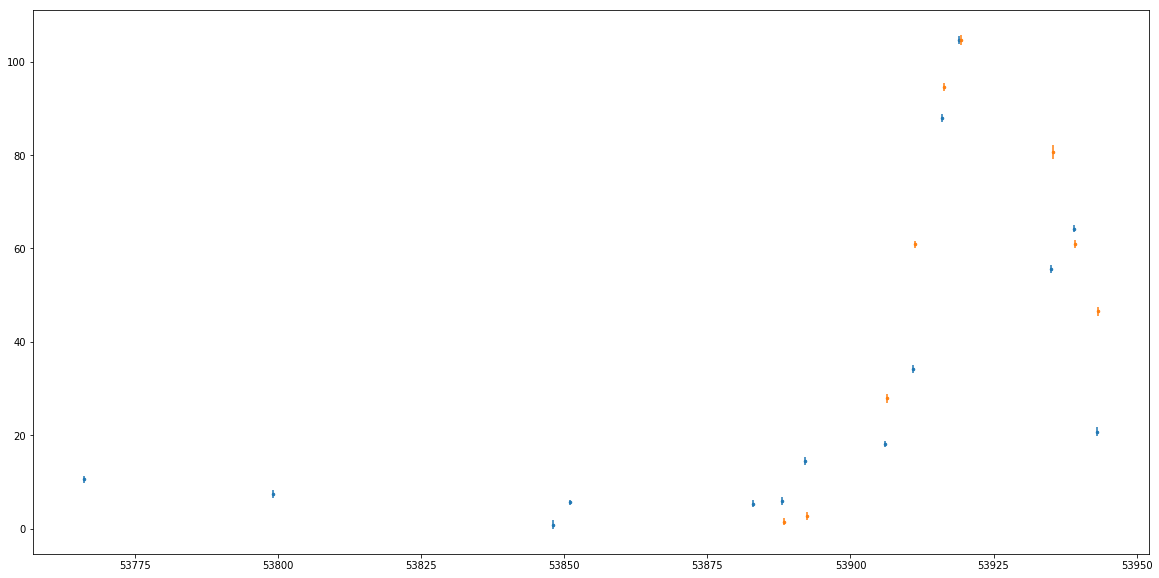

In [26]:
for match in matches:
    print len(match[-1])
    lc_fluxes = match[0]["flux"]
    factor = max(match[-1]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[0]["flux_error"], factor)
    
    plt.figure(figsize=(20,10))
    plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

12


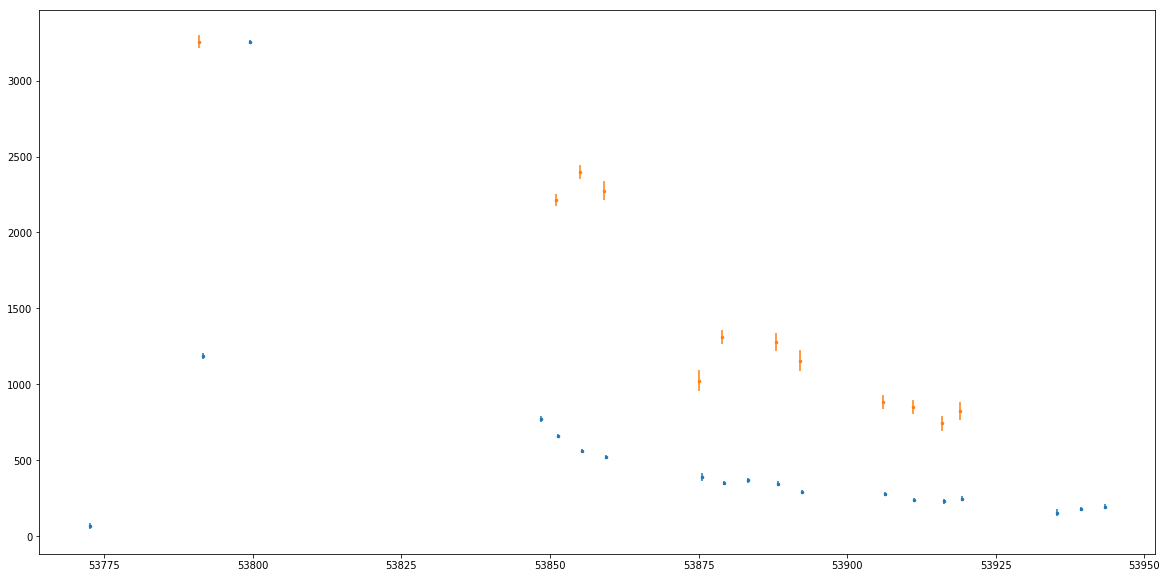

9


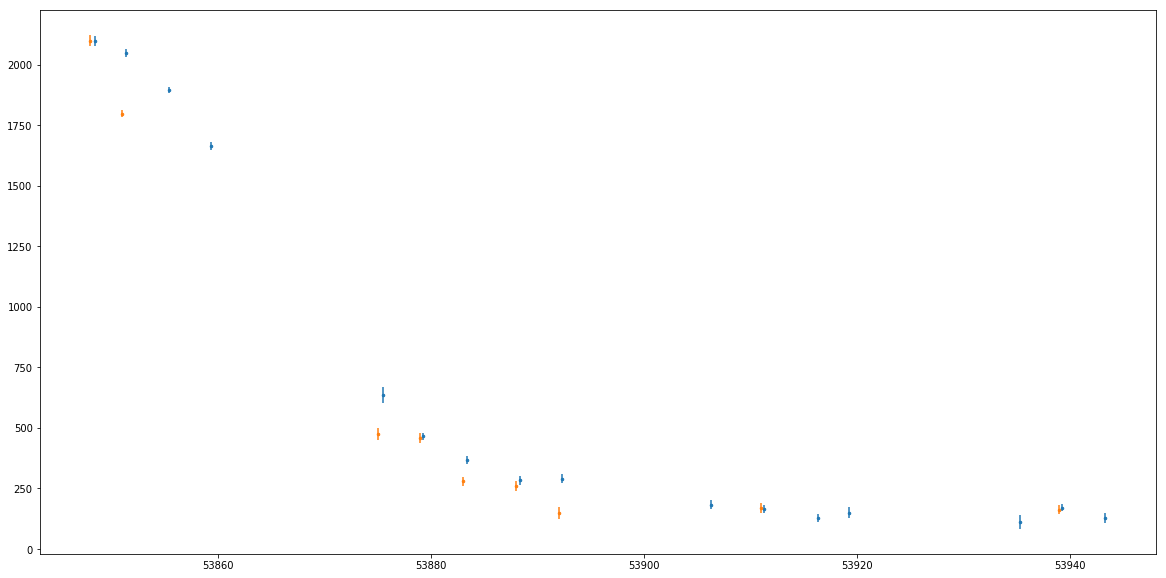

19


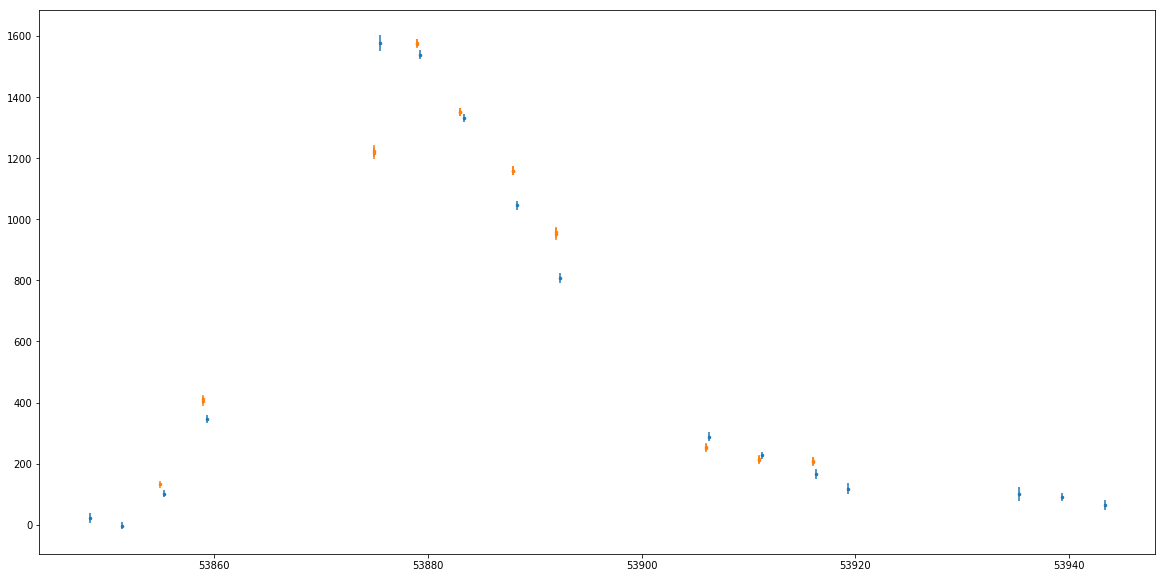

4


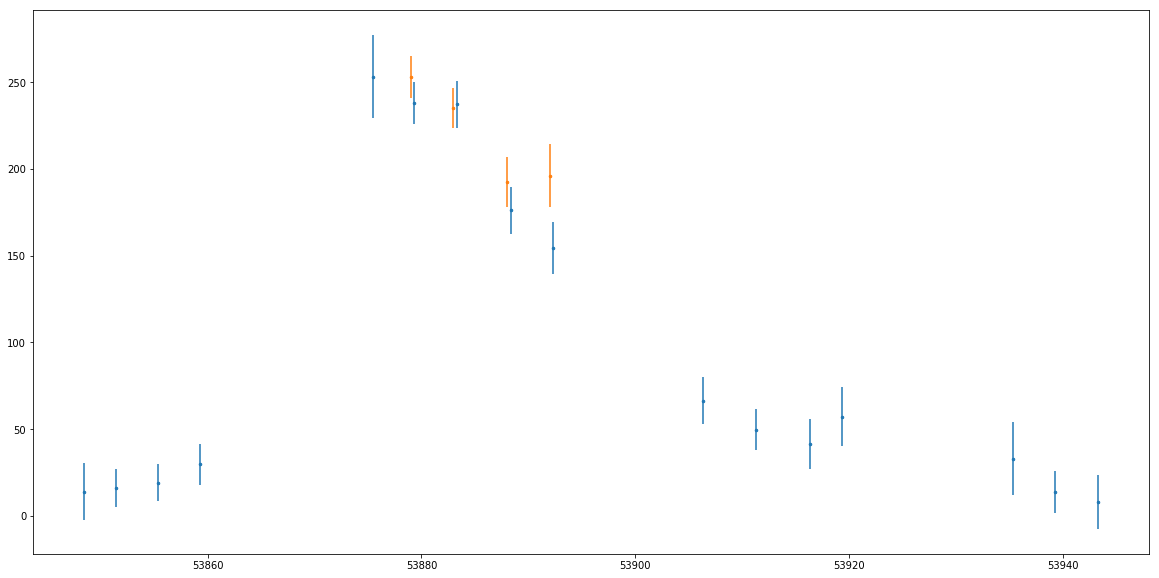

9


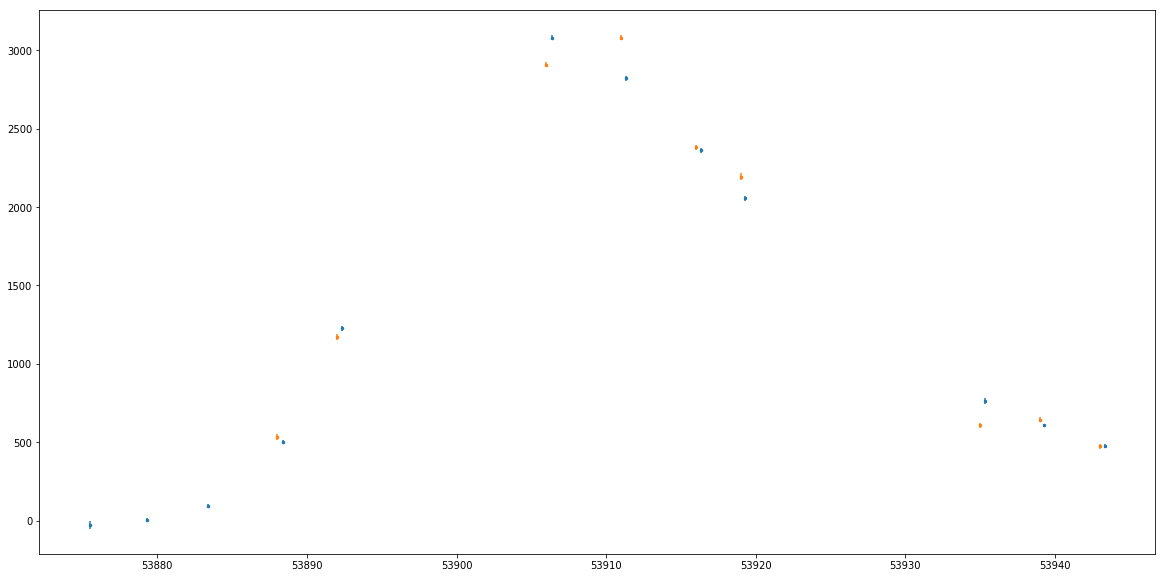

10


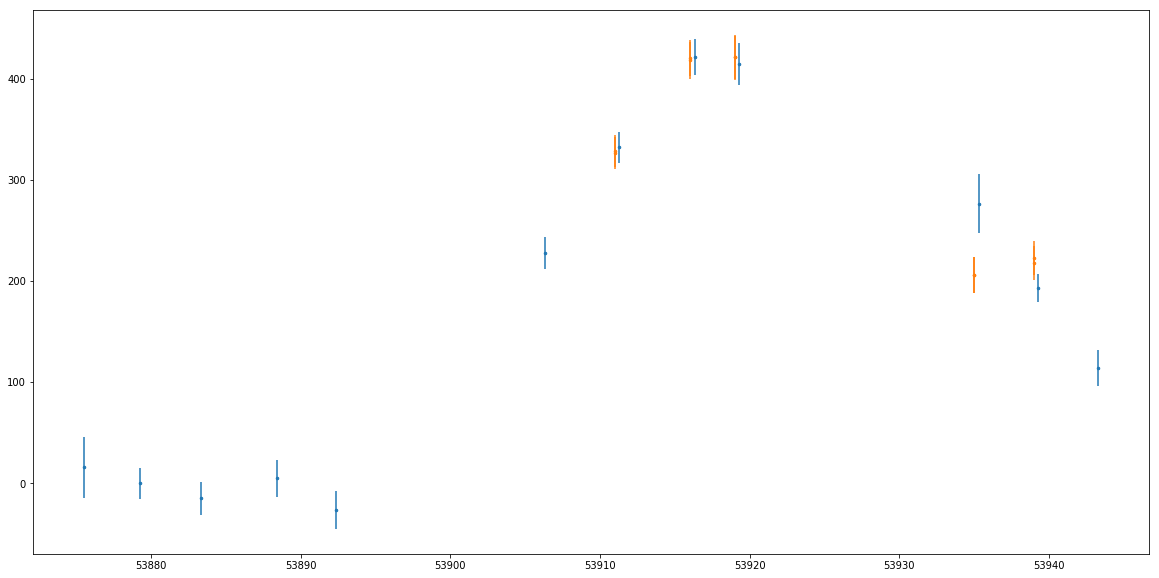

In [203]:
for match in matches:
    print len(match[0])
    lc_fluxes = match[0]["flux"]
    factor = max(match[-1]['flux']) / max(lc_fluxes)
    lc_fluxes = np.multiply(lc_fluxes, factor)
    lc_errors = np.multiply(match[0]["flux_error"], factor)
    
    plt.figure(figsize=(20,10))
    plt.errorbar(match[-1]["mjd"], match[-1]["flux"],yerr=match[-1]["flux_error"], fmt='.', markersize='5')
    plt.errorbar(match[0]["mjd"], lc_fluxes, yerr=lc_errors, fmt='.', markersize='5')
    plt.show()

In [27]:
date = dates[0]
patch_and_coord = []
degrees = []
for lc in snls_array:
    for patch in patches:

        if butler.datasetExists("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
                dayDiff = butler.get("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
                bbox = dayDiff.getBBox()
                wcs = dayDiff.getWcs()
                
                angle_ra = afwGeom.Angle(lc[0]["ra"])
                angle_dec = afwGeom.Angle(lc[0]["dec"])
                coord = wcs.skyToPixel(angle_ra, angle_dec)
                
                if bbox.contains(afwGeom.Point2I(coord)):
                    patch_and_coord.append((patch, angle_ra.asDegrees(), angle_dec.asDegrees(), np.median(lc['mjd'])))
                    break
                    
    degrees.append(coord)

In [30]:
for lc in snls_array:
    print np.rad2deg(lc[0]["ra"]), np.rad2deg(lc[0]["dec"])

214.291841667 53.024825
215.181558333 52.1910638889
214.381666667 52.9124722222
214.8577 52.6409833333
215.571704167 52.9576805556
215.552404167 52.6408472222
214.247466667 52.8825444444
214.340266667 52.4528166667
214.699175 52.7565583333
214.254529167 52.2324
214.847579167 53.0230138889
215.305566667 52.4560777778
215.519875 52.3383666667
215.077520833 52.8971638889
214.6309125 52.4429083333
214.435958333 52.3611805556
214.263475 52.9362527778


In [31]:
degrees

[Point2D(25323.18874, 22303.84902),
 Point2D(14840.43981, 6058.773333),
 Point2D(24286.84096, 20109.64456),
 Point2D(18701.97249, 14806.75441),
 Point2D(10330.56728, 21009.1521),
 Point2D(10498.7165, 14841.67938),
 Point2D(25866.73134, 19539.56048),
 Point2D(24839.16963, 11168.46853),
 Point2D(20568.37307, 17058.296),
 Point2D(25892.95755, 6887.154183),
 Point2D(18818.65779, 22240.92673),
 Point2D(13391.91137, 11223.69696),
 Point2D(10830.02805, 8951.9238),
 Point2D(16120.33044, 19795.23409),
 Point2D(21393.0068, 10957.08075),
 Point2D(23715.23112, 9377.55081),
 Point2D(25669.85971, 20583.06095)]

In [32]:
patch_and_coord

[('14,5', 215.18155833333333, 52.191063888888884, 53875.5),
 ('24,20', 214.38166666666666, 52.91247222222222, 53875.510000000002),
 ('18,14', 214.85769999999997, 52.64098333333333, 53883.370000000003),
 ('24,11', 214.34026666666665, 52.45281666666667, 53890.364999999998),
 ('20,16', 214.699175, 52.75655833333333, 53890.364999999998),
 ('18,22', 214.84757916666663, 53.02301388888889, 53890.364999999998),
 ('13,11', 215.30556666666664, 52.45607777777778, 53890.364999999998),
 ('16,19', 215.07752083333332, 52.89716388888889, 53908.82),
 ('21,10', 214.6309125, 52.44290833333333, 53908.809999999998),
 ('23,9', 214.4359583333333, 52.361180555555556, 53916.339999999997)]

In [121]:
dataId= {"filter":'r',"tract":0, "patch":'20,16', 'date':'2006-06-25'}
dayDiff = butler.get("dayDiff_differenceExp", dataId=dataId)
catalog = butler.get("dayDiff_class_diaSrc", dataId=dataId)
ds9.mtv(dayDiff, frame=1)
ds9.setMaskTransparency(100, frame=1)
for source in catalog:
    
    ds9.dot("o", source.getX(), source.getY(), size = 25, ctype = ds9.RED, frame=1)
    
bbox = dayDiff.getBBox()
wcs = dayDiff.getWcs()
                
angle_ra = afwGeom.Angle(214.699175, afwGeom.degrees)
angle_dec = afwGeom.Angle( 52.7565583333 , afwGeom.degrees)
coord = wcs.skyToPixel(angle_ra, angle_dec)
print coord
ds9.dot("o", coord.getX(), coord.getY(), size = 20, ctype = ds9.BLUE, frame=1)

(20568, 17058)


In [120]:
date = dates[0]
patch_and_coord = []
degrees = []
for patch in patches:
    if butler.datasetExists("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date}):
        dayDiff = butler.get("dayDiff_differenceExp", dataId={"filter":'r',"tract":0, "patch":patch, 'date':date})
        bbox = dayDiff.getBBox()
        wcs = dayDiff.getWcs()
        print bbox
    

Box2I((11900, 4900), (13099, 6099))
Box2I((11900, 5900), (13099, 7099))
Box2I((11900, 6900), (13099, 8099))
Box2I((11900, 7900), (13099, 9099))
Box2I((11900, 8900), (13099, 10099))
Box2I((11900, 9900), (13099, 11099))
Box2I((11900, 10900), (13099, 12099))
Box2I((11900, 11900), (13099, 13099))
Box2I((11900, 12900), (13099, 14099))
Box2I((11900, 13900), (13099, 15099))
Box2I((11900, 14900), (13099, 16099))
Box2I((11900, 15900), (13099, 17099))
Box2I((11900, 16900), (13099, 18099))
Box2I((11900, 17900), (13099, 19099))
Box2I((11900, 18900), (13099, 20099))
Box2I((11900, 19900), (13099, 21099))
Box2I((11900, 20900), (13099, 22099))
Box2I((11900, 21900), (13099, 23099))
Box2I((11900, 22900), (13099, 24099))
Box2I((11900, 23900), (13099, 25099))
Box2I((11900, 24900), (13099, 26099))
Box2I((12900, 4900), (14099, 6099))
Box2I((12900, 5900), (14099, 7099))
Box2I((12900, 6900), (14099, 8099))
Box2I((12900, 7900), (14099, 9099))
Box2I((12900, 8900), (14099, 10099))
Box2I((12900, 9900), (14099, 11